<a href="https://colab.research.google.com/github/samuelpolontalo/Malaria_Detection/blob/main/Malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# from google.colab import files
# files.upload()

In [3]:
# Install kaggle library 
!pip install -q kaggle
# Make ".kaggle" directory in root directory
!mkdir -p ~/.kaggle
# Copy the API token to the kaggle directory
!cp kaggle.json ~/.kaggle/
# Check the directory
!ls ~/.kaggle
# Adjust access permissions
!chmod 600 /root/.kaggle/kaggle.json

# WTF reinstall kaggle
!pip uninstall -y kaggle
!pip install kaggle

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 3.5 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=6717405c66808696dea9be381389258f3174bc5f8a7d8fbb47b40dcb9bd4f22b
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [4]:
os.environ["KAGGLE_USERNAME"] = 'samuelpolontalotest'
os.environ["KAGGLE_KEY"] = '9be16db0455dd105d8abf50b24736291'

In [5]:
!mkdir downloaded-data

In [6]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 670M/675M [00:03<00:00, 156MB/s]
100% 675M/675M [00:03<00:00, 178MB/s]


In [7]:
!mkdir {"extracted-data"}

In [8]:
path_to_zip_file = '/content/cell-images-for-detecting-malaria.zip'

In [9]:
directory_to_extract_to = '/content/extracted-data'

In [10]:
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [11]:
os.listdir('/content/extracted-data/cell_images')

['cell_images', 'Parasitized', 'Uninfected']

In [12]:
print (len(os.listdir('/content/extracted-data/cell_images/Parasitized')))
print (len(os.listdir('/content/extracted-data/cell_images/Uninfected')))

13780
13780


In [13]:
# membuat nama directori
base_dir = '/content/extracted-data/cell_images'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [14]:
# membuat direktori untuk setiap klasifikasi
parasitized_dir = os.path.join(base_dir,'Parasitized')
uninfected_dir = os.path.join(base_dir, 'Uninfected')

In [15]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [16]:
# memecah direktori parasitized menjadi data train dan data validation
val_parasitized_dir, train_parasitized_dir = train_test_split(os.listdir(parasitized_dir), test_size = 0.8)
val_uninfected_dir, train_uninfected_dir = train_test_split(os.listdir(uninfected_dir), test_size = 0.8)

In [17]:
len(train_parasitized_dir)/len(os.listdir('/content/extracted-data/cell_images/Parasitized'))

0.8

In [18]:
#membuat direktori ruangan rapi pada direktori data training
train_parasitized = os.path.join(train_dir, 'parasitized')
train_uninfected = os.path.join(train_dir, 'uninfected')

if not os.path.exists(train_parasitized):
  os.mkdir(train_parasitized)
if not os.path.exists(train_uninfected):
  os.mkdir(train_uninfected)

In [19]:
# membuat direktori ruangan rapi pada direktori data validating
val_parasitized = os.path.join(validation_dir, 'parasitized')
val_uninfected = os.path.join(validation_dir, 'uninfected')

if not os.path.exists(val_parasitized):
  os.mkdir(val_parasitized)
if not os.path.exists(val_uninfected):
  os.mkdir(val_uninfected)

In [20]:
# meng copy data train dan data val ke directory baru
import shutil

for i in train_parasitized_dir:
  shutil.copy(os.path.join(parasitized_dir, i), os.path.join(train_parasitized, i))
for i in train_uninfected_dir:
  shutil.copy(os.path.join(uninfected_dir,i), os.path.join(train_uninfected,i))

for i in val_parasitized_dir:
  shutil.copy(os.path.join(parasitized_dir, i), os.path.join(val_parasitized,i))
for i in val_uninfected_dir:
  shutil.copy(os.path.join(uninfected_dir,i), os.path.join(val_uninfected,i))

In [21]:
print ('jumlah data train parasitized adalah ',len(os.listdir('/content/extracted-data/cell_images/train/parasitized')))
print ('jumlah data train uninfected adalah ',len(os.listdir('/content/extracted-data/cell_images/train/uninfected')))

jumlah data train parasitized adalah  11024
jumlah data train uninfected adalah  11024


In [22]:
print ('jumlah data validation parasitized adalah ',len(os.listdir('/content/extracted-data/cell_images/val/parasitized')))
print ('jumlah data validation uninfected adalah ',len(os.listdir('/content/extracted-data/cell_images/val/uninfected')))

jumlah data validation parasitized adalah  2756
jumlah data validation uninfected adalah  2756


In [23]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 22047 images belonging to 2 classes.
Found 5511 images belonging to 2 classes.


In [28]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(2, activation= 'softmax')
])

In [29]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
from datetime import datetime
start_time = datetime.now()


history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/20
25/25 - 51s - loss: 0.7112 - accuracy: 0.5038 - val_loss: 0.6898 - val_accuracy: 0.5000 - 51s/epoch - 2s/step
Epoch 2/20
25/25 - 46s - loss: 0.6534 - accuracy: 0.6200 - val_loss: 0.6038 - val_accuracy: 0.7625 - 46s/epoch - 2s/step
Epoch 3/20
25/25 - 46s - loss: 0.6304 - accuracy: 0.6787 - val_loss: 0.5599 - val_accuracy: 0.7875 - 46s/epoch - 2s/step
Epoch 4/20
25/25 - 48s - loss: 0.5359 - accuracy: 0.7788 - val_loss: 0.6441 - val_accuracy: 0.4062 - 48s/epoch - 2s/step
Epoch 5/20
25/25 - 46s - loss: 0.4542 - accuracy: 0.8050 - val_loss: 0.2786 - val_accuracy: 0.8938 - 46s/epoch - 2s/step
Epoch 6/20
25/25 - 48s - loss: 0.4234 - accuracy: 0.8687 - val_loss: 0.2272 - val_accuracy: 0.9438 - 48s/epoch - 2s/step
Epoch 7/20
25/25 - 46s - loss: 0.2264 - accuracy: 0.9062 - val_loss: 0.2012 - val_accuracy: 0.9312 - 46s/epoch - 2s/step
Epoch 8/20
25/25 - 48s - loss: 0.2044 - accuracy: 0.9362 - val_loss: 0.2830 - val_accuracy: 0.9250 - 48s/epoch - 2s/step
Epoch 9/20
25/25 - 46s - loss: 0

Text(0.5, 1.0, 'Training and Validation Accuracy')

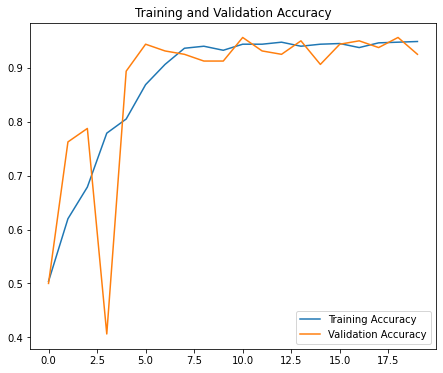

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

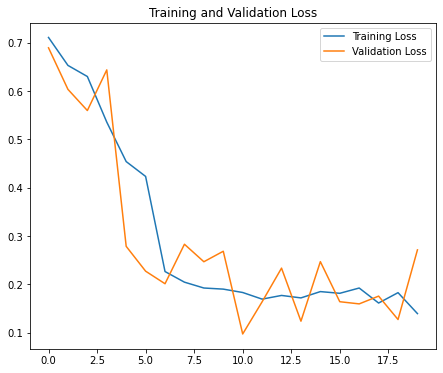

In [32]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
from tensorflow.keras.utils import img_to_array

Saving C100P61ThinF_IMG_20150918_144104_cell_162.png to C100P61ThinF_IMG_20150918_144104_cell_162.png
1/1 [==============================] - 0s 169ms/step
C100P61ThinF_IMG_20150918_144104_cell_162.png
Uninfected


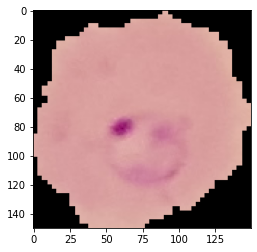

In [42]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import tensorflow as tf
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = tf.keras.utils.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Uninfected')
  elif classes[0,1]!=0:
    print('Parasitized')